#### Problem Statement

Analyze ABC Co's sales data from 2014 to 2018 to identify key drivers of revenue and profit across products, channels, and regions. Uncover seasonal trends and outliers, and evaluate performance against budgets. Utilize these insights to optimize pricing, promotions, and market expansion strategies for sustainable growth and reduced concentration risk.

Specifically, this analysis aims to:
- Identify top-performing and underperforming products, channels, and regions.
- Understand the impact of seasonality on sales and profit margins.
- Provide data-driven recommendations for strategic decision-making.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
sheets = pd.read_excel('/content/Regional Sales Dataset.xlsx', sheet_name = None)

In [49]:
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']


In [50]:
print("df_sales shape: ",(df_sales.shape))
print("df_customers shape: ",(df_customers.shape))
print("df_products shape: ",(df_products.shape))
print("df_regions shape: ",(df_regions.shape))
print("df_state_reg shape: ",(df_state_reg.shape))
print("df_budgets shape: ",(df_budgets.shape))


df_sales shape:  (64104, 12)
df_customers shape:  (175, 2)
df_products shape:  (30, 2)
df_regions shape:  (994, 15)
df_state_reg shape:  (49, 3)
df_budgets shape:  (30, 2)


In [51]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [52]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [53]:
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1 :].reset_index(drop=True)

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [54]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [55]:
df_customers.isnull().sum()

,0
Customer Index,0
Customer Names,0


Data Cleaning And Wrangling

In [56]:
## Merge with Customer
df = df_sales.merge(
    df_customers,
    how = 'left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)


In [57]:
df.head(2)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd


In [58]:
## Merge With Prodcuts
df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)


In [59]:
df.head(2)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20


In [60]:
## Merge With Regions
df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)


In [61]:
df.head(2)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis


In [62]:
## Merge With State Region
df = df.merge(
    df_state_reg[["State Code", "Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)


In [63]:
df.head(2)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest


In [64]:
cols_to_drop =['Customer Index','Index','id','State Code']
df = df.drop(columns=cols_to_drop,errors='ignore')

In [65]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast


In [66]:
df.coloums = df.columns.str.lower()
df.columns.values

/tmp/ipython-input-3141240673.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.coloums = df.columns.str.lower()


array(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Names', 'Product Name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'Region'],
      dtype=object)

In [67]:
## Merge With Budgets
df = df.merge(
    df_budgets,
    how='left',
    on ='Product Name'
)


In [68]:
df.columns = df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [69]:
 ## Keeping the important colums and deleting the colums we dont need

cols_to_keep = [

 'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]

In [70]:
df = df[cols_to_keep]

In [71]:
df.head(2)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120


In [72]:
# Rename the columns

# Rename the columns
df = df.rename(columns={
    'ordernumber': 'order_number',
    'orderdate': 'order_date',
    'customer names': 'customer_name',
    'product name': 'product_name',
    'order quantity': 'order_quantity',
    'unit price': 'unit_price',
    'line total': 'revenue',
    'total unit cost': 'cost',
    'state_code': 'state',
    'state': 'state_name',
    'latitude': 'lat',
    'longitude': 'lon',
    '2017 budgets': 'budget'
})


In [73]:
df.head(2)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state,county,state_name,region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120


In [74]:
# Blank out budget for non-2017 orders
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

# Line total is revenue
df[['order_date', 'product_name', 'revenue', 'budget']].tail(2)


,order_date,product_name,revenue,budget
64102,2018-02-28,Product 20,27717.9,NaN
64103,2018-02-28,Product 15,7986.4,NaN


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    64104 non-null  object        
 1   order_date      64104 non-null  datetime64[ns]
 2   customer_name   64104 non-null  object        
 3   channel         64104 non-null  object        
 4   product_name    64104 non-null  object        
 5   order_quantity  64104 non-null  int64         
 6   unit_price      64104 non-null  float64       
 7   revenue         64104 non-null  float64       
 8   cost            64104 non-null  float64       
 9   state           64104 non-null  object        
 10  county          64104 non-null  object        
 11  state_name      64104 non-null  object        
 12  region          64104 non-null  object        
 13  lat             64104 non-null  float64       
 14  lon             64104 non-null  float64       
 15  bu

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    64104 non-null  object        
 1   order_date      64104 non-null  datetime64[ns]
 2   customer_name   64104 non-null  object        
 3   channel         64104 non-null  object        
 4   product_name    64104 non-null  object        
 5   order_quantity  64104 non-null  int64         
 6   unit_price      64104 non-null  float64       
 7   revenue         64104 non-null  float64       
 8   cost            64104 non-null  float64       
 9   state           64104 non-null  object        
 10  county          64104 non-null  object        
 11  state_name      64104 non-null  object        
 12  region          64104 non-null  object        
 13  lat             64104 non-null  float64       
 14  lon             64104 non-null  float64       
 15  bu

In [77]:
## filter the dataset to include only the record for year 2017
df_2017 = df[df['order_date'].dt.year == 2017]

In [78]:
df_2017.head(2)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state,county,state_name,region,lat,lon,budget
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645


In [79]:
df['total_cost'] = df['order_quantity'] * df['cost']


In [80]:
df['profit'] = df['revenue'] - df['total_cost']
df['profit_margin_pct']=df['profit']/df['revenue']*100


In [81]:
df.head(2)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state,county,state_name,region,lat,lon,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0


### EDA


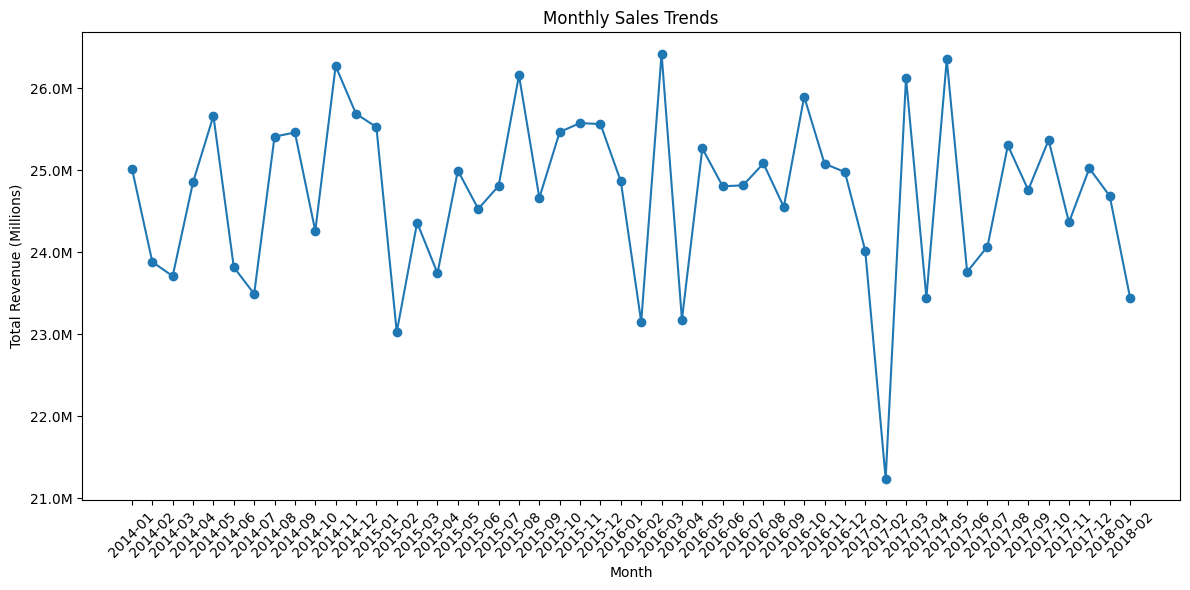

In [83]:
## MONTHLY SALES TRENDS

df['order_month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('order_month')['revenue'].sum()
plt.figure(figsize=(12, 6))
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')  # fixed le6 → 1e6
plt.gca().yaxis.set_major_formatter(formatter)
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


INSIGHTS:
Based on the sales data analysis from 2014 to 2018, several key insights emerge: The monthly sales trend reveals noticeable seasonality with revenue peaking in certain months, particularly towards the end of the year. A significant disparity exists in product performance, with the top 10 products contributing substantially more revenue than the bottom 10. The wholesale channel dominates in terms of total sales, underscoring its importance while also suggesting opportunities for growth in the Export and Distributor channels. The distribution of average order value provides insights into typical transaction sizes, which can inform pricing strategies. Analyzing unit price distribution per product can help identify pricing outliers. Geographically, certain states are major revenue drivers and order centers. Furthermore, while average profit margins across channels appear relatively close, a deeper look at customer segmentation by revenue and profit margin can identify high-value customers. Finally, the correlation heatmap offers a view of the relationships between numerical metrics, which can guide further investigation into key performance drivers.


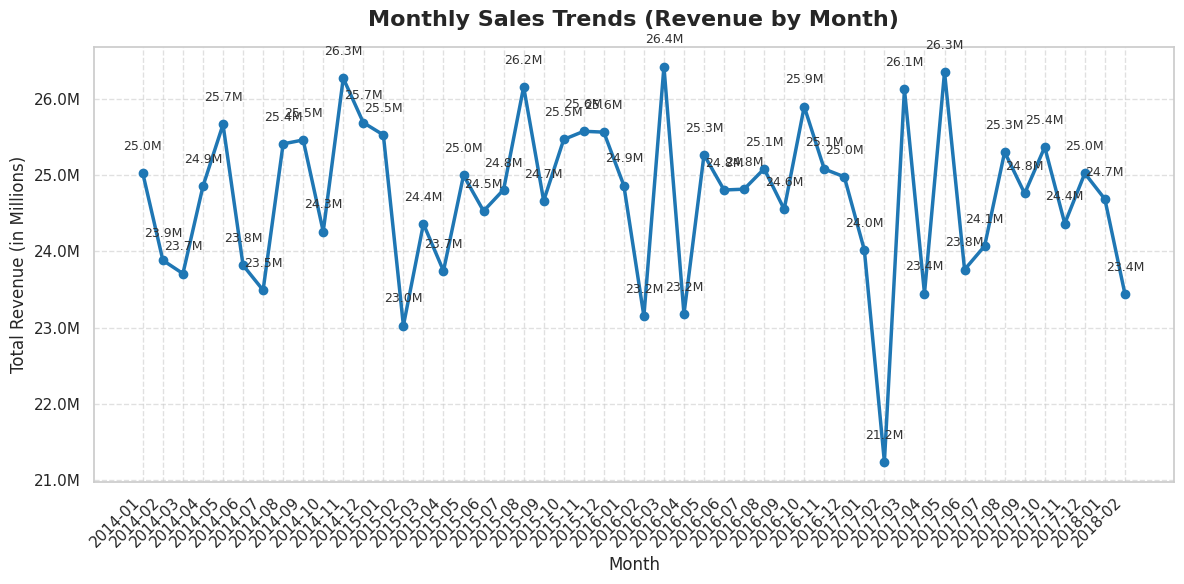

In [106]:
df['order_month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('order_month')['revenue'].sum()
months = monthly_sales.index.astype(str)
values = monthly_sales.values
plt.figure(figsize=(12, 6))
plt.plot(months, values, color='#1f77b4', linewidth=2.5, marker='o', markersize=6)
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Monthly Sales Trends (Revenue by Month)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (in Millions)', fontsize=12)
plt.xticks(rotation=45, ha='right')
for x, y in zip(months, values):
    plt.text(x, y + (max(values)*0.01), f'{y/1e6:.1f}M', ha='center', va='bottom', fontsize=9, color='#333')
plt.tight_layout()
plt.show()

INSIGHTS:
Based on the sales data analysis from 2014 to 2018, key insights include significant seasonal sales trends peaking towards year-end, a large disparity between top and bottom performing products by revenue, and the dominance of the wholesale channel. Average order value and unit price distributions offer strategic pricing insights. Geographically, certain states are major revenue drivers. While average channel profit margins are similar, customer segmentation reveals high-value customers. Correlation analysis highlights relationships between numerical metrics for further investigation.

In [85]:
# Ensure order_date is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Filter out records from February 2018
df_new = df[~((df['order_date'].dt.year == 2018) & (df['order_date'].dt.month == 2))]


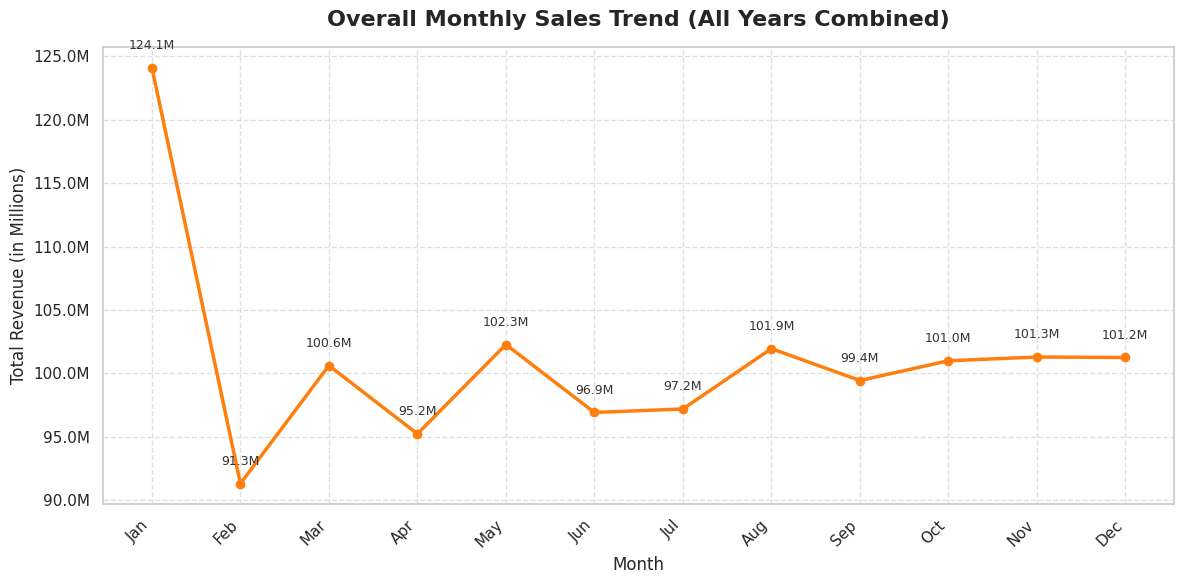

In [108]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import calendar

df['order_month_num'] = df_new['order_date'].dt.month
df['order_month_name'] = df_new['order_date'].dt.month_name()

monthly_seasonality = (
    df.groupby('order_month_num')['revenue']
      .sum()
      .reset_index()
      .sort_values('order_month_num')
)

monthly_seasonality['month'] = monthly_seasonality['order_month_num'].dropna().apply(lambda x: calendar.month_abbr[int(x)])

plt.figure(figsize=(12, 6))
plt.plot(
    monthly_seasonality['month'],
    monthly_seasonality['revenue'],
    color='#ff7f0e',
    linewidth=2.5,
    marker='o',
    markersize=6
)

formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(True, linestyle='--', alpha=0.6)

plt.title('Overall Monthly Sales Trend (All Years Combined)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (in Millions)', fontsize=12)

plt.xticks(rotation=45, ha='right')

for x, y in zip(monthly_seasonality['month'], monthly_seasonality['revenue']):
    plt.text(x, y + (max(monthly_seasonality['revenue']) * 0.01), f'{y/1e6:.1f}M',
             ha='center', va='bottom', fontsize=9, color='#333')

plt.tight_layout()
plt.show()

INSIGHTS:
Based on the sales data analysis from 2014 to 2018, key insights include significant seasonal sales trends peaking towards year-end, a large disparity between top and bottom performing products by revenue, and the dominance of the wholesale channel. Average order value and unit price distributions offer strategic pricing insights. Geographically, certain states are major revenue drivers. While average channel profit margins are similar, customer segmentation reveals high-value customers. Correlation analysis highlights relationships between numerical metrics for further investigation.

<!-- A clear pattern of seasonality is evident, with sales generally peaking towards the end of the year. -->
<!-- There are noticeable fluctuations in revenue throughout the year, indicating that sales are not consistent and are influenced by factors that vary month-to-month. -->

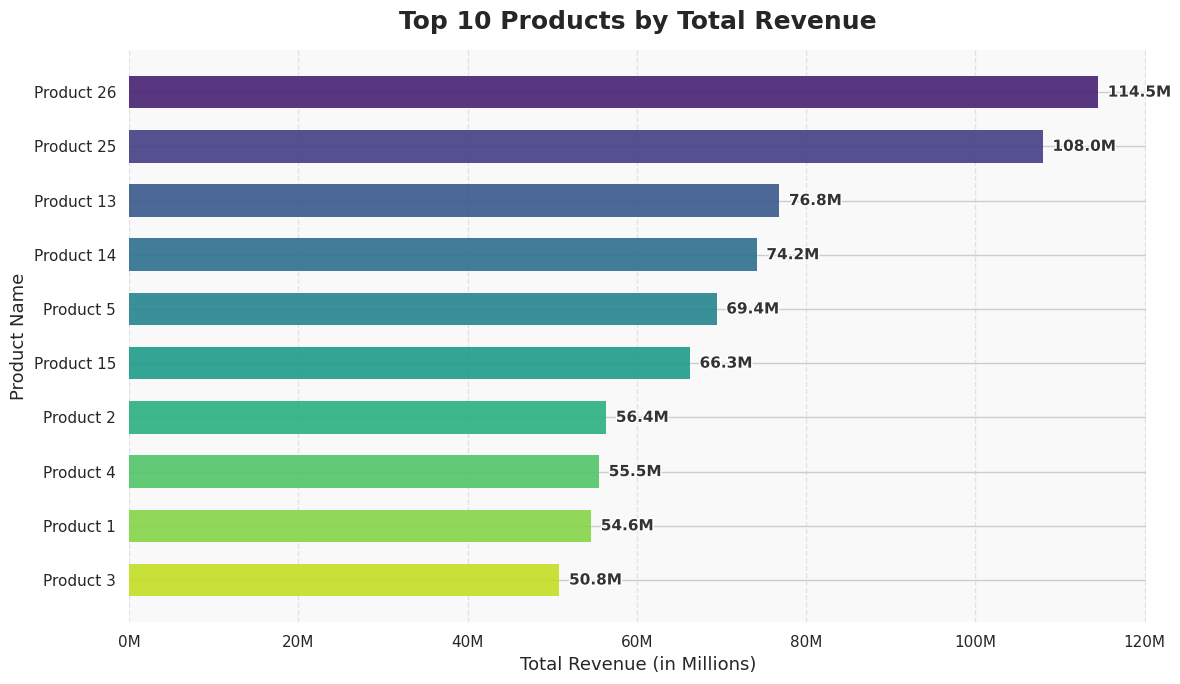

In [109]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import matplotlib.patheffects as path_effects

top_products = (
    df_new.groupby('product_name')['revenue']
          .sum()
          .reset_index()
          .sort_values('revenue', ascending=False)
          .head(10)
)

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

colors = sns.color_palette("viridis", len(top_products))

bars = plt.barh(
    top_products['product_name'],
    top_products['revenue'],
    color=colors,
    edgecolor='none',
    height=0.6,
    alpha=0.9
)

plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + (max(top_products['revenue']) * 0.01),
        bar.get_y() + bar.get_height()/2,
        f'{width/1e6:.1f}M',
        va='center',
        ha='left',
        fontsize=11,
        fontweight='bold',
        color='#333',
        path_effects=[path_effects.withStroke(linewidth=2, foreground='white')]
    )

formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M')
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Top 10 Products by Total Revenue', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Total Revenue (in Millions)', fontsize=13)
plt.ylabel('Product Name', fontsize=13)

plt.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)

plt.gca().set_facecolor('#f9f9f9')

plt.tight_layout()
plt.show()

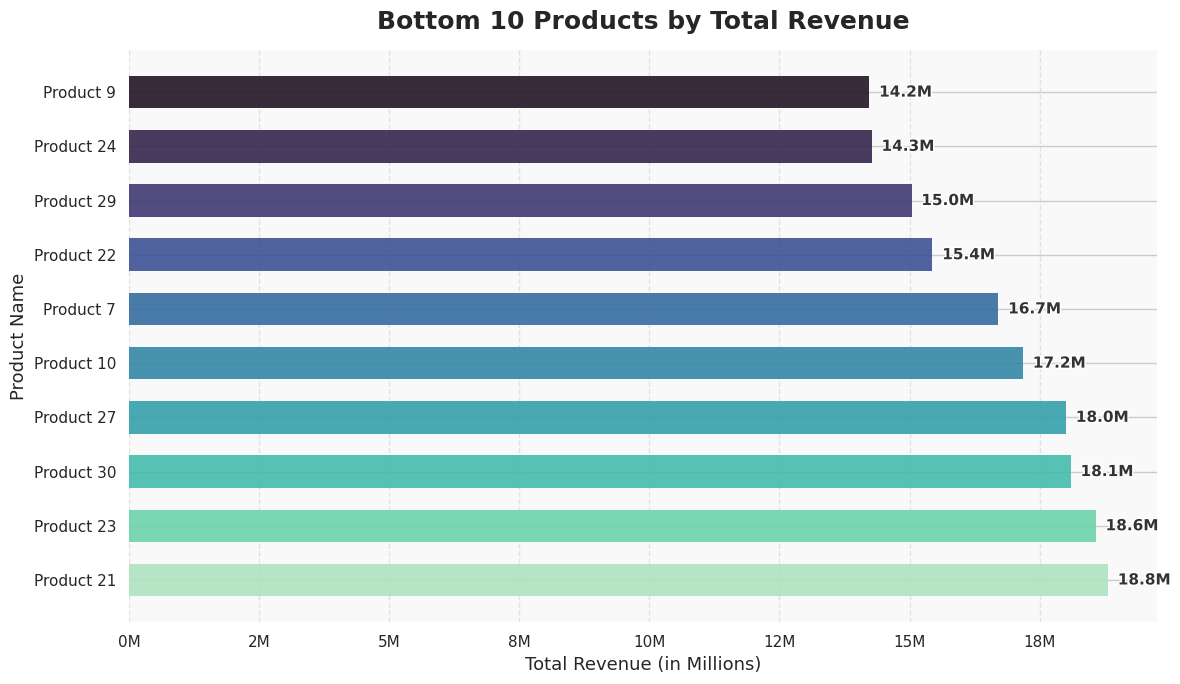

In [110]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import matplotlib.patheffects as path_effects

bottom_products = (
    df_new.groupby('product_name')['revenue']
          .sum()
          .reset_index()
          .sort_values('revenue', ascending=True)
          .head(10)
)

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

colors = sns.color_palette("mako", len(bottom_products))

bars = plt.barh(
    bottom_products['product_name'],
    bottom_products['revenue'],
    color=colors,
    edgecolor='none',
    height=0.6,
    alpha=0.9
)

plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + (max(bottom_products['revenue']) * 0.01),
        bar.get_y() + bar.get_height()/2,
        f'{width/1e6:.1f}M',
        va='center',
        ha='left',
        fontsize=11,
        fontweight='bold',
        color='#333',
        path_effects=[path_effects.withStroke(linewidth=2, foreground='white')]
    )

formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M')
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Bottom 10 Products by Total Revenue', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Total Revenue (in Millions)', fontsize=13)
plt.ylabel('Product Name', fontsize=13)

plt.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)

plt.gca().set_facecolor('#f9f9f9')

plt.tight_layout()
plt.show()

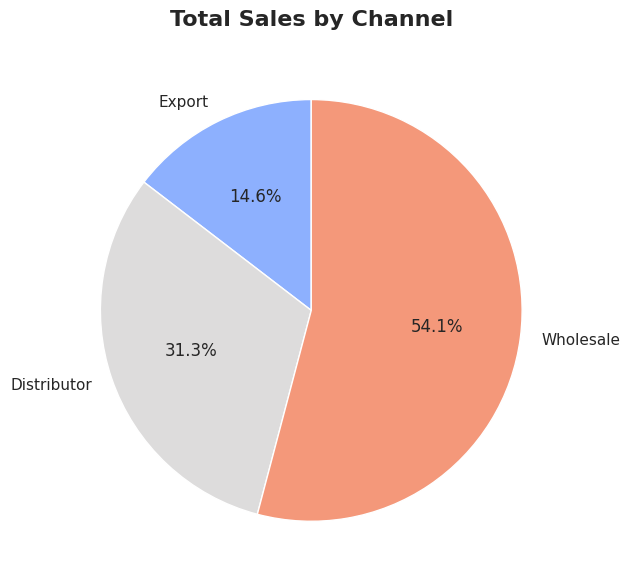

In [111]:
chan_sales = (
    df_new.groupby('channel')['revenue']
          .sum()
          .sort_values(ascending=True)
)

plt.figure(figsize=(9, 6))

plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('coolwarm', len(chan_sales)),
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

plt.title('Total Sales by Channel', fontsize=16, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

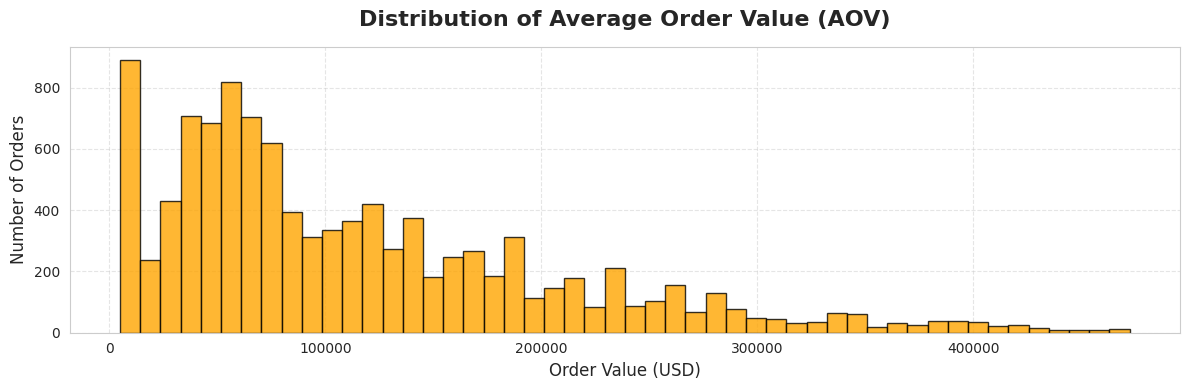

In [93]:
# Calculate AOV per order (group by order_number)
aov = df.groupby('order_number')['revenue'].sum()

# Plot histogram
plt.figure(figsize=(12, 4))
plt.hist(
    aov,
    bins=50,
    color='orange',
    edgecolor='black',
    alpha=0.8
)

# Add title and labels
plt.title('Distribution of Average Order Value (AOV)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Order Value (USD)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Add gridlines for readability
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


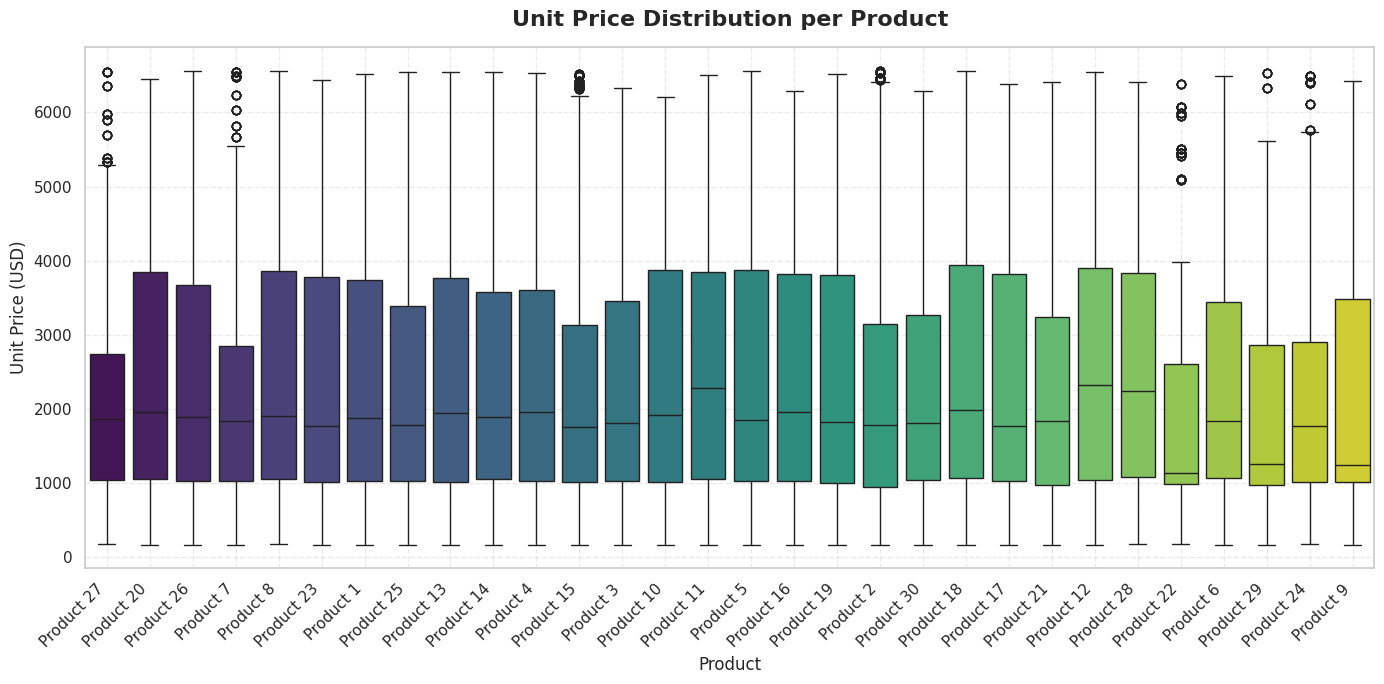

In [94]:
###unit price distribution per product
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))

sns.boxplot(
    data=df,
    x='product_name',
    y='unit_price',
    hue='product_name',
    dodge=False,
    palette='viridis',
    legend=False
)


plt.title('Unit Price Distribution per Product', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Unit Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


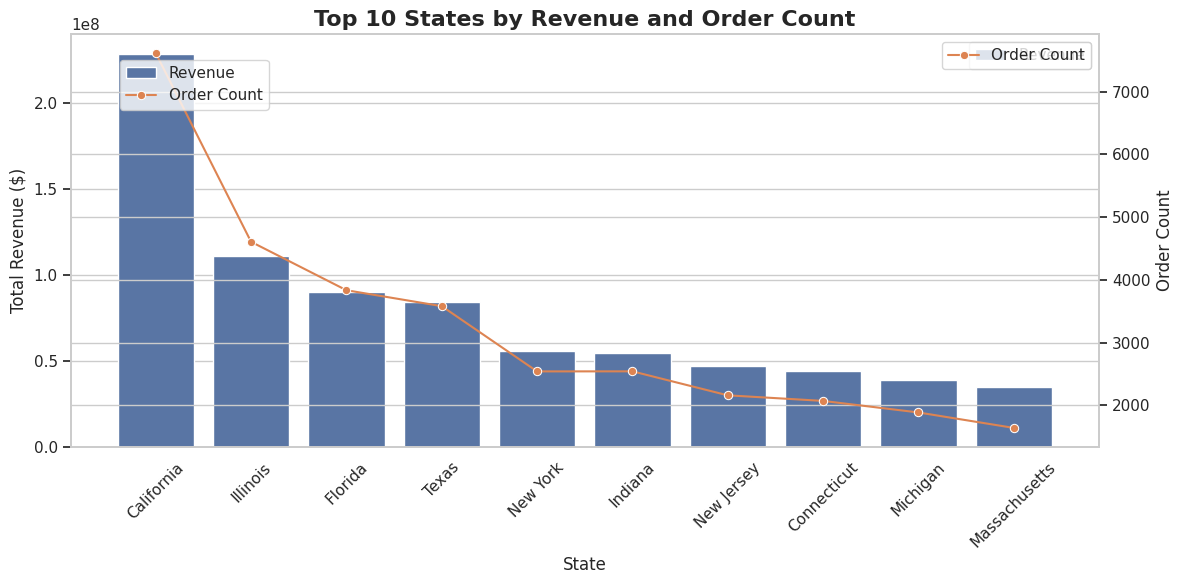

In [95]:
##Top 10 States by Revenue and Order Count
state_summary = (
    df.groupby('state_name')
      .agg({'revenue': 'sum', 'order_number': 'nunique'})
      .sort_values('revenue', ascending=False)
      .head(10)
      .reset_index()
)


fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(data=state_summary, x='state_name', y='revenue', color='#4c72b0', ax=ax1, label='Revenue')

ax2 = ax1.twinx()
sns.lineplot(data=state_summary, x='state_name', y='order_number', color='#dd8452', marker='o', ax=ax2, label='Order Count')

ax1.set_title('Top 10 States by Revenue and Order Count', fontsize=16, fontweight='bold')
ax1.set_xlabel('State')
ax1.set_ylabel('Total Revenue ($)')
ax2.set_ylabel('Order Count')

ax1.tick_params(axis='x', rotation=45)
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.tight_layout()
plt.show()


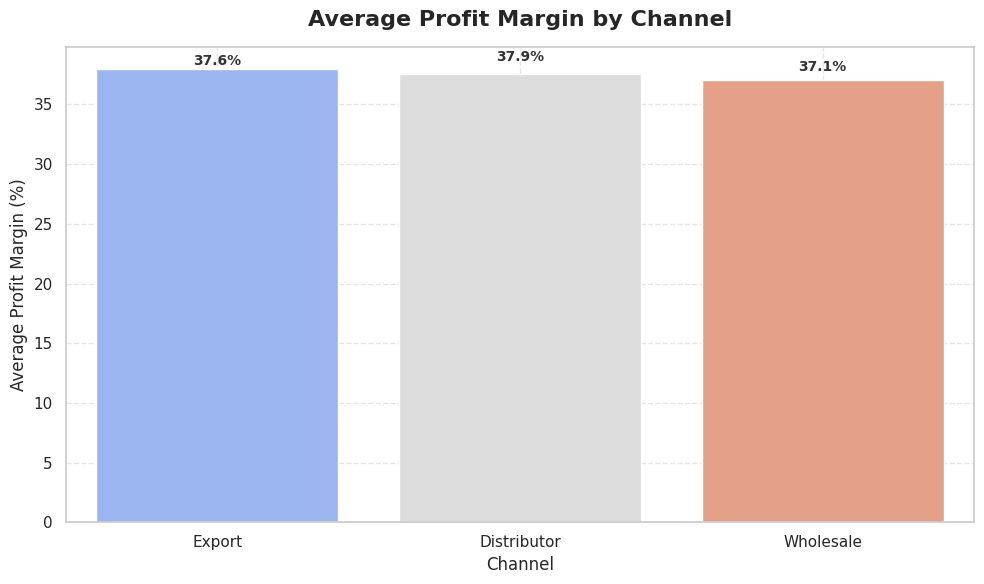

In [98]:
# Calculate average profit margin by channel

channel_profit = (
    df.groupby('channel')['profit_margin']
      .mean()
      .reset_index()
      .sort_values('profit_margin', ascending=False)
)

plt.figure(figsize=(10, 6))


sns.barplot(
    data=channel_profit,
    x='channel',
    y='profit_margin',
    hue='channel',
    palette='coolwarm',
    dodge=False,
    legend=False
)


plt.title('Average Profit Margin by Channel', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Average Profit Margin (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)


for i, row in channel_profit.iterrows():
    plt.text(i, row['profit_margin'] + 0.5, f"{row['profit_margin']:.1f}%",
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='#333')

plt.tight_layout()
plt.show()


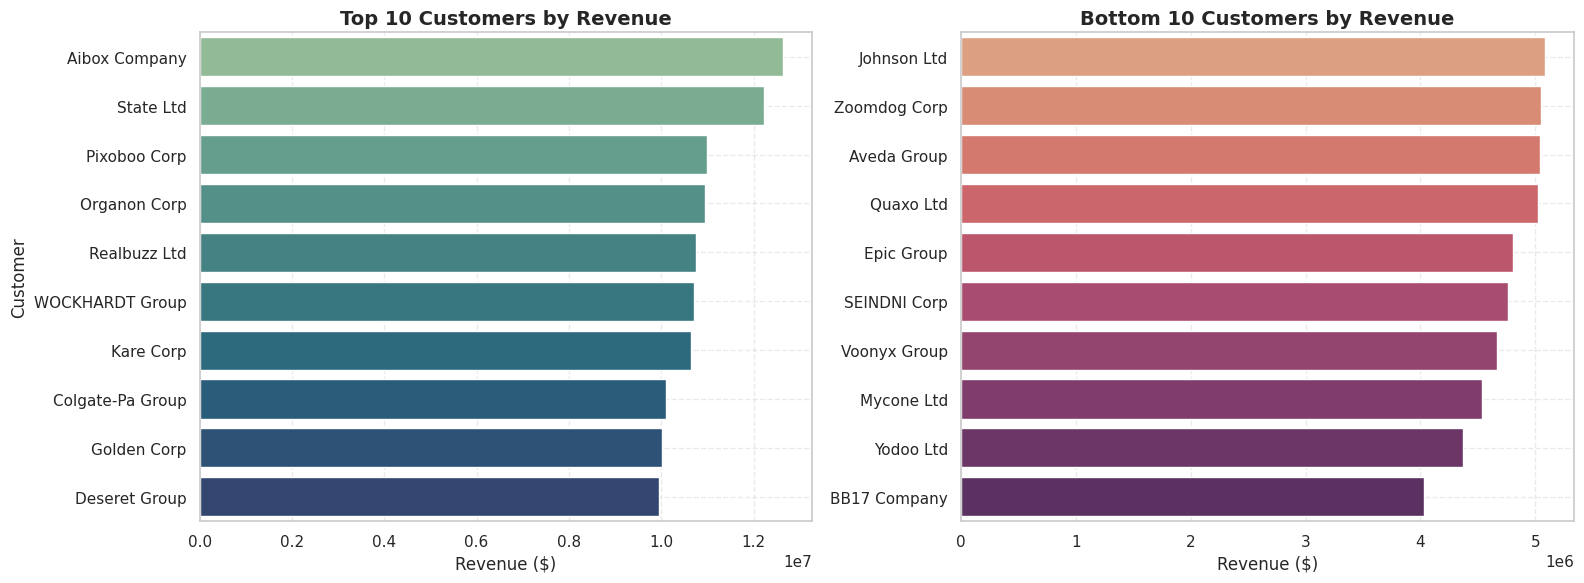

In [99]:
customer_revenue = (
    df.groupby('customer_name')['revenue']
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

top_10_customers = customer_revenue.head(10)
bottom_10_customers = customer_revenue.tail(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(
    data=top_10_customers,
    y='customer_name',
    x='revenue',
    hue='customer_name',
    palette='crest',
    dodge=False,
    legend=False,
    ax=axes[0]
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Revenue ($)')
axes[0].set_ylabel('Customer')
axes[0].grid(True, linestyle='--', alpha=0.4)


sns.barplot(
    data=bottom_10_customers,
    y='customer_name',
    x='revenue',
    hue='customer_name',
    palette='flare',
    dodge=False,
    legend=False,
    ax=axes[1]
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Revenue ($)')
axes[1].set_ylabel('')
axes[1].grid(True, linestyle='--', alpha=0.4)


plt.tight_layout()
plt.show()


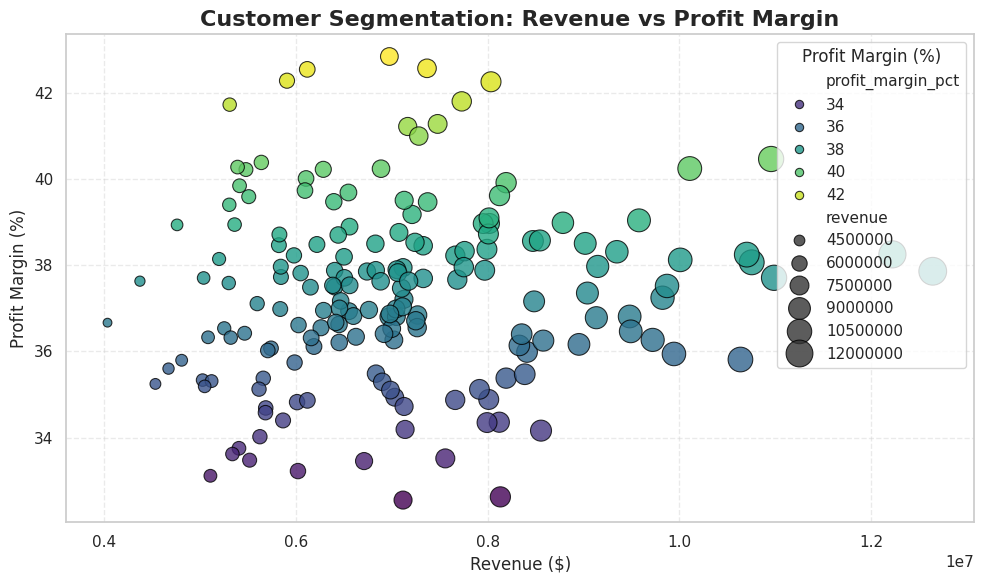

In [101]:
###Customer Segmentation: Revenue vs Profit Margin
customer_seg = (
    df.groupby('customer_name')
      .agg({'revenue': 'sum', 'profit_margin': 'mean'})
      .reset_index()
)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=customer_seg,
    x='revenue',
    y='profit_margin',
    hue='profit_margin',
    size='revenue',
    sizes=(40, 400),
    palette='viridis',
    alpha=0.8,
    edgecolor='black'
)

plt.title('Customer Segmentation: Revenue vs Profit Margin', fontsize=16, fontweight='bold')
plt.xlabel('Revenue ($)')
plt.ylabel('Profit Margin (%)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title='Profit Margin (%)')
plt.tight_layout()
plt.show()


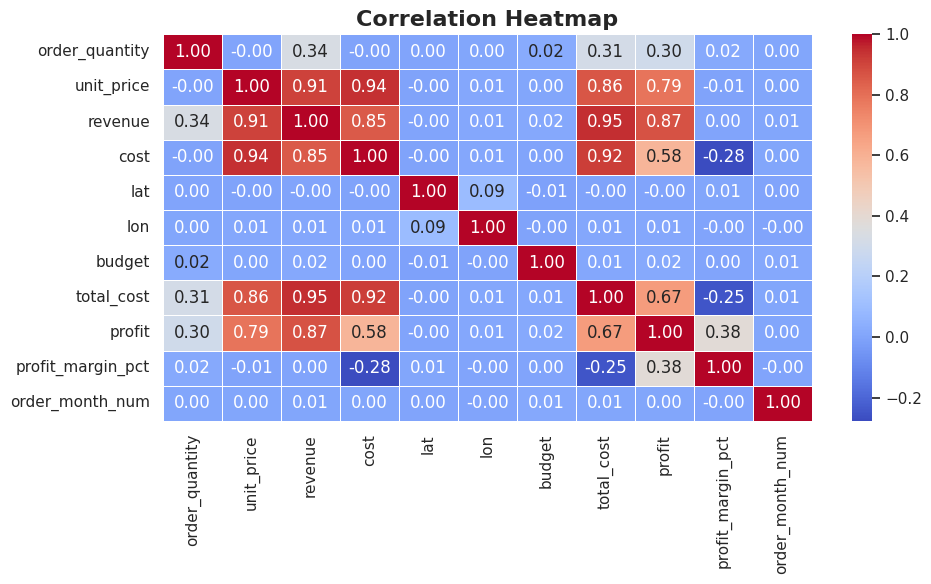

In [102]:
###Correlation Heatmap

numeric_cols = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(
    numeric_cols.corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [104]:
df.to_csv('Sales Analysis (After EDA).csv')

In [ ]:
from google.colab import files
files.download('Sales Analysis (After EDA).csv')